In [18]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

tf.config.list_physical_devices('GPU') 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


Assumes you are in Module 2 directory

In [19]:
path_cats_and_dogs = "../data/cats-and-dogs.zip"

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../data')
zip_ref.close()

In [20]:
print(len(os.listdir('../data/PetImages/Cat/')))
print(len(os.listdir('../data/PetImages/Dog/')))

# Expected Output:
# 1500
# 1500

1500
1500


In [21]:
try:
    os.mkdir("../data/cats-v-dogs/")
    os.mkdir("../data/cats-v-dogs/training")
    os.mkdir("../data/cats-v-dogs/testing")
    os.mkdir("../data/cats-v-dogs/training/cats")
    os.mkdir("../data/cats-v-dogs/training/dogs")
    os.mkdir("../data/cats-v-dogs/testing/cats")
    os.mkdir("../data/cats-v-dogs/testing/dogs")
except OSError as e:
    print(e)
    pass

[WinError 183] Cannot create a file when that file already exists: '../data/cats-v-dogs/'


In [22]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    file_list = os.listdir(SOURCE)
    file_list = random.sample(file_list, len(file_list))
    train = file_list[0:int(len(file_list)*SPLIT_SIZE)]
    test = file_list[int(len(file_list)*SPLIT_SIZE):]
    
    for file in train:
        file_path = SOURCE + file
        if os.path.getsize(file_path) > 0:
            copyfile(file_path, TRAINING+file)
            
    for file in test:
        file_path = SOURCE + file
        if os.path.getsize(file_path) > 0:
            copyfile(file_path, TESTING+file)

CAT_SOURCE_DIR = "../data/PetImages/Cat/"
TRAINING_CATS_DIR = "../data/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "../data/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "../data/PetImages/Dog/"
TRAINING_DOGS_DIR = "../data/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "../data/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [9]:
print(len(os.listdir('../data/cats-v-dogs/training/cats/')))
print(len(os.listdir('../data/cats-v-dogs/training/dogs/')))
print(len(os.listdir('../data/cats-v-dogs/testing/cats/')))
print(len(os.listdir('../data/cats-v-dogs/testing/dogs/')))

# Expected output:
# 1350
# 1350
# 150
# 150

1350
1350
150
150


In [10]:
model = tf.keras.models.Sequential([
# Input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [12]:
TRAINING_DIR = '../data/cats-v-dogs/training/'
train_datagen = train_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=8,
                                                    class_mode='binary',
                                                    target_size=(150, 150))  #YOUR CODE HERE

VALIDATION_DIR = '../data/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=8,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [13]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


C:\Users\Khachatur\Miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
338/338 [==============================] - 23s 52ms/step - loss: 0.9048 - acc: 0.5753 - val_loss: 0.6130 - val_acc: 0.6467
Epoch 2/20
338/338 [==============================] - 5s 14ms/step - loss: 0.6301 - acc: 0.6808 - val_loss: 0.5659 - val_acc: 0.7400
Epoch 3/20
338/338 [==============================] - 5s 14ms/step - loss: 0.5295 - acc: 0.7573 - val_loss: 0.5525 - val_acc: 0.7067
Epoch 4/20
338/338 [==============================] - 4s 13ms/step - loss: 0.4679 - acc: 0.7800 - val_loss: 0.5555 - val_acc: 0.7300
Epoch 5/20
338/338 [==============================] - 4s 13ms/step - loss: 0.4121 - acc: 0.8253 - val_loss: 0.5234 - val_acc: 0.7400
Epoch 6/20
338/338 [==============================] - 5s 15ms/step - loss: 0.3430 - acc: 0.8528 - val_loss: 0.5086 - val_acc: 0.7733
Epoch 7/20
338/338 [==============================] - 5s 15ms/step - loss: 0.2653 - acc: 0.8891 - val_loss: 0.5876 - val_acc: 0.7400
Epoch 8/20
338/338 [==============================] - 5s 14ms/step -

Text(0.5, 1.0, 'Training and validation loss')

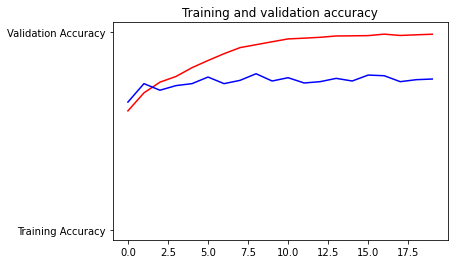

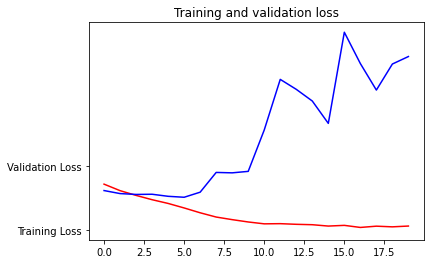

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)